##                                            Tâche 8

## Import packages + Téléchargement structure de la bande

In [260]:
from pymatgen import Structure
from matplotlib import pyplot as plt
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure import plotter
from pymatgen.electronic_structure import bandstructure as bs
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
with MPRester("2zPo57HHJnOTqpLHp5c") as m:
    bands= m.get_bandstructure_by_material_id("mp-1434", True)

Ci-dessous est illustré le diagramme de la structure de bande du cristal MoS2.

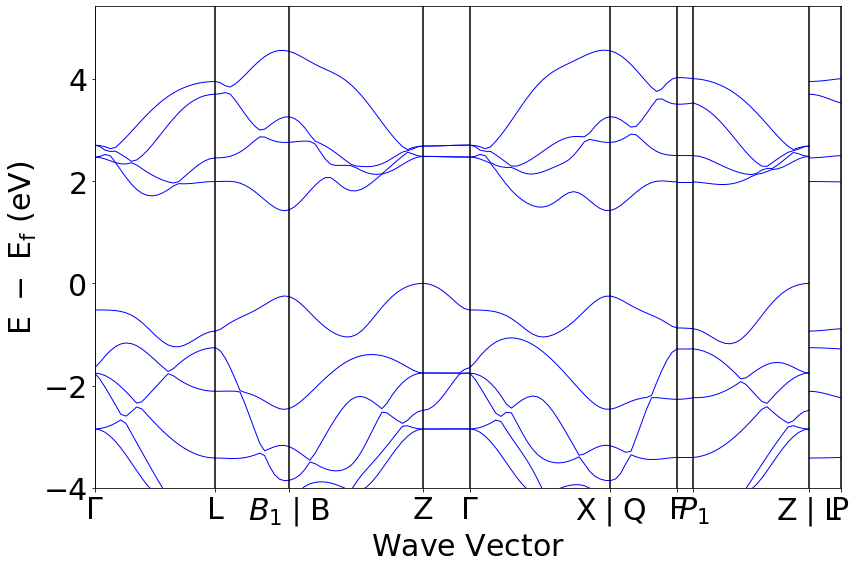

In [261]:
bp=plotter.BSPlotter(bands)
bp.show()

 ## 1) Analyse de la bande interdite 
 La fonction ci-dessous permet de récolter des informations concernant la bande interdite du cristal MoS2. 
 En effet, celui-ci est un semi-conducteur dont la bande interdite à une énergie de 1.4224 eV.
 
 De plus, la bande interdite est indirecte. Cela signique que la différence entre le vecteur d'onde du maximum de la dernière bande de valence et le vecteur d'onde du minimum de la première bande de conduction est non nulle. Le vecteur d'onde va dès lors évoluer dans la bande interdite suivant une direction Z-[0.5, 0.166,-0.166]. 

In [262]:
BI=bands.get_band_gap()
print(BI)

{'direct': False, 'energy': 1.4223999999999997, 'transition': 'Z-(0.500,0.166,-0.166)'}


## 2.a) Dispersion maximale et minimale  de la dernière bande de valence
Tout d'abord, nous allons rechercher l'indice de la dernière bande de valence. L'objectif ensuite est de calculer les pentes afin de déterminer la dispersion maximale et minimale de la dernière bande de valence.  

In [263]:
vbm = bands.get_vbm()
print("L'index de la dernière bande de valence:" , vbm['band_index'])

L'index de la dernière bande de valence: defaultdict(<class 'list'>, {<Spin.up: 1>: [11]})


In [264]:
#énergies
data=bp.bs_plot_data()
label=data.get('ticks').get('label') 
print(label)
IndTh=np.array([0,1,3,4,6,8,9,11,13,14]) #nouveau vecteur pour éviter les redondances

E0v = np.zeros((9)) 
E1v = np.zeros((9))
diffv = np.zeros((9))
for i in range(0,9):
    E0v[i] = (data.get("energy")[i].get("1")[11])[0] #on stocke la première énergie de la branche
    E1v[i] = (data.get("energy")[i].get("1")[11])[-1]#on stocke la dernière énergie de la branche
    diffv[i]=E1v[i]-E0v[i] #calcul des différence d'energie
    i = i+1
print("ΔEnergies :" ,diffv)

['$\\Gamma$', 'L', 'L', '$B_1$$\\mid$B', 'Z', 'Z', '$\\Gamma$', '$\\Gamma$', 'X$\\mid$Q', 'F', 'F', '$P_1$', '$P_1$', 'Z$\\mid$L', 'P']
ΔEnergies : [-0.4139  0.6754  0.2587 -0.5202  0.2713 -0.6237 -0.0155  0.8881  0.046 ]


In [265]:
#calcul des distances 
position=np.zeros(len(IndTh))
dist=np.zeros(len(IndTh)-1)
for i in range(0,len(IndTh)) : 
    if i==0 :
        position[i]=data.get('ticks').get('distance')[0]
    else: 
        position[i]=data.get('ticks').get('distance')[IndTh[i]]
        dist[i-1]=position[i]-position[i-1]
print("Les distances :" , dist)

Les distances : [1.14645952 0.70052971 1.26872334 0.44210009 1.33489138 0.63436166
 0.1522378  1.09874665 0.29719888]


In [266]:
#pentes
pentevs=np.zeros(len(IndTh)-1)
pentevs=diffv/dist
print("Les pentes :" ,pentesv)
print("La pente max en valeur absolue :" ,np.max(abs(pentesv)))
print("La pente min en valeur absolue :" ,np.min(abs(pentesv)))

Les pentes : [-0.36102452  0.96412756  0.20390576 -1.17665663  0.20323751 -0.98319309
 -0.1018144   0.80828461  0.15477851]
La pente max en valeur absolue : 1.1766566337101019
La pente min en valeur absolue : 0.10181440022622071


##  2.b) Dispersion maximale et minimale  de la première bande de conduction
Tout d'abord, nous allons rechercher l'indice de la première bande de conduction. L'objectif ensuite est de calculer les pentes  afin de déterminer la dispersion maximale et minimale de la première bande de conduction.


In [267]:
cbm = bands.get_cbm()
print("L'index de la première bande de conduction :" ,cbm['band_index'])

L'index de la première bande de conduction : defaultdict(<class 'list'>, {<Spin.up: 1>: [12]})


In [268]:
#énergies
data=bp.bs_plot_data()
label=data.get('ticks').get('label') 
#print(label)
IndTh=np.array([0,1,3,4,6,8,9,11,13,14]) #nouveau vecteur afin d'éviter les redondances
diffc= np.zeros((9))
E0c = np.zeros((9))
E1c = np.zeros((9))
diffc = np.zeros((9))
for i in range(0,9):
    E0c[i] = (data.get("energy")[i].get("1")[12])[0] #on stocke la première énergie de la branche
    E1c[i] = (data.get("energy")[i].get("1")[12])[-1]#on stocke la dernière énergie de la branche
    diffc[i]=E1c[i]-E0c[i] #calcul des différences d'énergies
    i = i+1
print("Δenergies :" ,diffc)

Δenergies : [-0.4792 -0.5534  1.0452 -0.0126 -1.0461  0.5596  0.      0.4991 -0.0073]


In [269]:
#calcul des distances
position=np.zeros(len(IndTh))
dist=np.zeros(len(IndTh)-1)
for i in range(0,len(IndTh)) : 
    if i==0 :
        position[i]=data.get('ticks').get('distance')[0]
    else: 
        position[i]=data.get('ticks').get('distance')[IndTh[i]]
        dist[i-1]=position[i]-position[i-1]
print("Les distances:" ,dist)

Les distances: [1.14645952 0.70052971 1.26872334 0.44210009 1.33489138 0.63436166
 0.1522378  1.09874665 0.29719888]


In [270]:
#pentes
pentesc=np.zeros(len(IndTh)-1)
pentesc=diffc/dist
print("Les pentes :",pentesc)
print("La pente max en valeur abolue :",np.max(abs(pentesc)))
print("La pente min en valeur absolue: ",np.min(abs(pentesc)))

Les pentes : [-0.41798249 -0.78997363  0.82382027 -0.02850033 -0.78365927  0.88214663
  0.          0.45424485 -0.02456268]
La pente max en valeur abolue : 0.8821466343771398
La pente min en valeur absolue:  0.0


## 2) Dispersions : conclusion

Ci-dessous est représenté le diagramme de structure de bande avec les dispersions maximales et minimales pour la dernière bande de valence et la première bande de conduction. 

La pente maximale de la dernière bande de valence vaut -1.1766 et se situe entre Z et Γ. Dès lors, la dernière bande de valence présente un maximum de dispersion selon la direction Z-Γ comme indiqué par la flèche verte.

La pente minimale de la dernière bande de valence vaut 0.1018 et se situe entre F et P₁. Dès lors, la dernière bande de valence présente un minimum de dispersion selon la direction F-P₁ comme indiqué par la flèche rouge.

La pente maximale de la première bande de conduction vaut 0.882 et se situe entre  X|Q et F. Dès lors, la première bande de conduction présente un maximum de dispersion selon la direction X|Q-F comme indiqué par la flèche jaune.

La pente minimale de la première bande de conduction est nulle et se situe entre F et P₁. Ce phénomène (non dispersion) est représenté par la flèche noire.

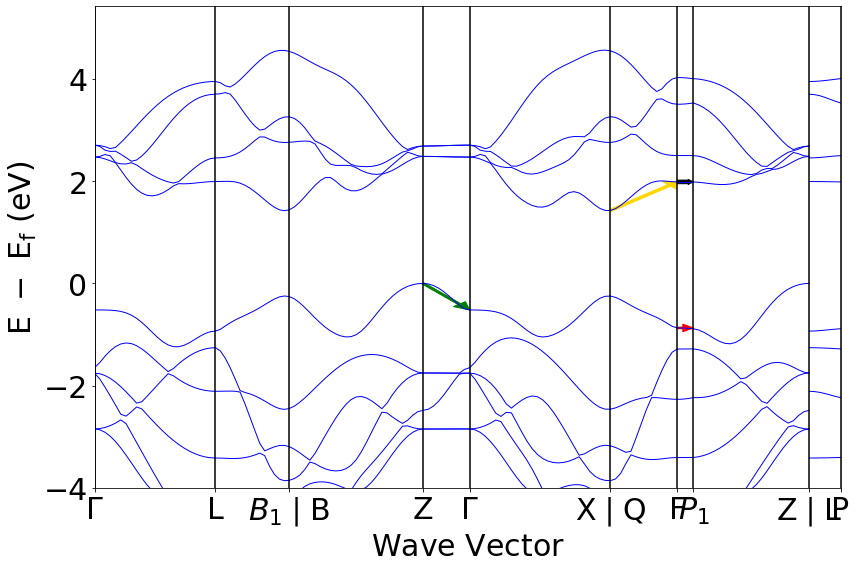

In [271]:
ticksv = data.get("ticks")
ticksc = data.get("ticks")
bp.get_plot(zero_to_efermi=True, ylim=None, smooth=False, vbm_cbm_marker=False, smooth_tol=None)
plt.arrow(ticksc.get("distance")[8], E0c[5], dist[5], diffc[5], color='gold', width = 0.04, head_width = 0.2, head_length = 0.1, length_includes_head= True)
plt.arrow(ticksc.get("distance")[10], E0c[6], dist[6], diffc[6], color='black', width = 0.07, head_width = 0.1, head_length = 0.05, length_includes_head= True)
plt.arrow(ticksv.get("distance")[5], E0v[3], dist[3], diffv[3], color='green', width = 0.03, head_width = 0.15, head_length = 0.15, length_includes_head= True)
plt.arrow(ticksv.get("distance")[9], E0v[6], dist[6], diffc[6], color='red', width = 0.03, head_width = 0.15, head_length = 0.1, length_includes_head= True)

## 3) Calcul des masses effectives
Sachant que la dispersion est parabolique, la masse effective sera constante. 

Celle-ci peut s'exprimer comme suit: 1/m* = (2π/h)² * (d²E/dk²). 

La masse effective sera positive pour le minimum de la première bande de conduction tandis qu'elle sera négative pour les maxima de la dernière bande de valence. 



## 3.a) Calcul de masse effective à la base de la première bande de conduction
L'équation parabolique s'écrit sous la forme de ax²+bx+c. 
Nous allons essayer de déterminer les 3 coefficients (a,b,c) avec à l'aide du minimum de la bande de conduction et 2 points avoisinants. Ces données permettront ensuite de calculer la masse effective grâce à la formule citée plus haut. 

Les coefficients a,b,c du polynome ax^2 +bx+c : [  8.57078813 -31.05354315  29.53983698]
Ci-dessous est représentée la dispersion parabolique (en rouge) pour le minimum de la première bande de conduction:


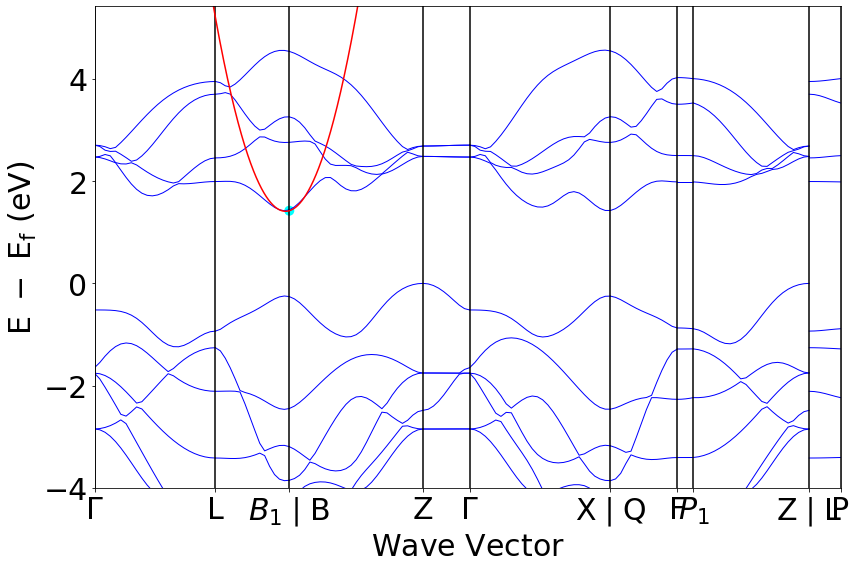

In [272]:
xc1 = ticksc.get("distance")[3]#abs min de la bande
gap = bands.get_band_gap()
yc1 = gap.get('energy') #energie min de la bande
xcav=data.get('distances')[1][-3] #point a gauche du min
xcap=data.get('distances')[2][+3] #point à droite du min
ycav=(data.get('energy')[1].get('1')[12])[-3] #energie du point à gauche du min
ycap=(data.get('energy')[2].get('1')[12])[+3] #energie du point à droite du min
xc=np.array([xcav,xc1,xcap])
yc=np.array([ycav,yc1,ycap])
xfinc=np.linspace(0.5,3,1000)
ac=np.polyfit(xc,yc,2) #renvoie les coefficients de la parabole passant par les points
print("Les coefficients a,b,c du polynome ax^2 +bx+c :",ac)
yfinc=np.polyval(ac,xfinc) #parabole 
print("Ci-dessous est représentée la dispersion parabolique (en rouge) pour le minimum de la première bande de conduction:")
a = bp.get_plot()
plt.plot(xfinc,yfinc,"r-")
plt.scatter([ticksc.get("distance")[3]],[gap.get('energy')], c = "cyan", s = 100, edgecolor = 'none', marker = 'o')
plt.show()


In [273]:
#masse effective 
A = 10**(-10)
eV = 1.602176563*10**(-19)
hbar = 1.054571818*10**(-34)
print("La dérivée seconde de cette dispersion parabolique vaut: E=",2*ac[0]," eV*A²")
der=2*ac[0]*(A**2)*eV #changement unité
print("soit",der,"J*m²")
meff=(hbar**2)/der
print('On peut dès lors calculer la masse effective à la base de la première bande de conduction.')
print('Celle-ci vaut m*=',meff,"kg")

La dérivée seconde de cette dispersion parabolique vaut: E= 17.14157625440852  eV*A²
soit 2.746383172769066e-38 J*m²
On peut dès lors calculer la masse effective à la base de la première bande de conduction.
Celle-ci vaut m*= 4.0494047966311925e-31 kg


## 3.b) masse effective du sommet de la dernière bande de valence
L'équation parabolique s'écrit sous la forme de ax²+bx+c. 
Nous allons essayer de déterminer les 3 coefficients (a,b,c) avec à l'aide du maximum de la dernière bande de valence et 2 points avoisinants. Comme représenté sur la figure ci-dessous en rose, il existe 2 maxima pour cette dernière bande de valence. Arbitrairement, le choix s'est porté de travailler sur le premier. Les données concernant la dispersion parabolique permettront ensuite de calculer la masse effective grâce à la formule citée plus haut.

Les coefficients a,b,c du polynome ax^2 +bx+c : [ -3.58740117  22.23248777 -34.44475351]
Ci-dessous est représenté la dispersion parabolique(en vert) pour un maximum de la dernière bande de valence:


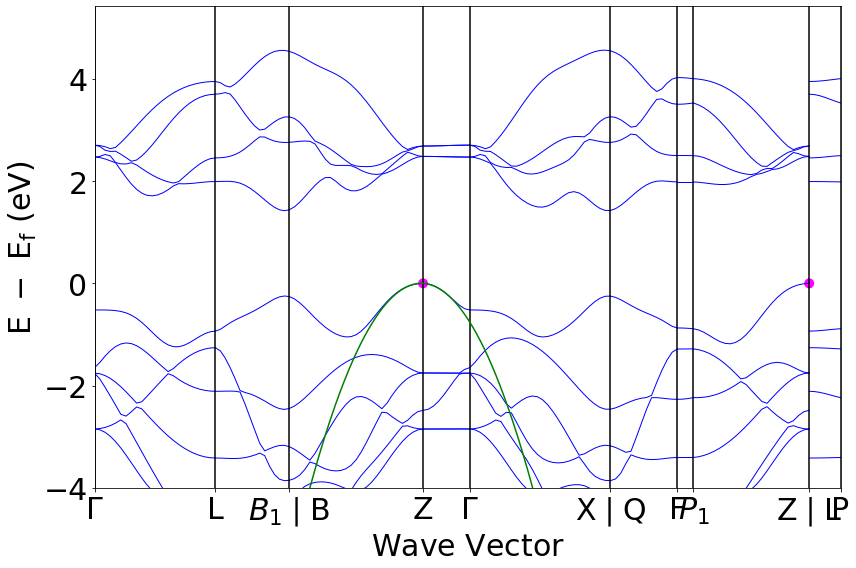

In [274]:
#bande de valence
xv1 = ticksc.get("distance")[4]#abs min de la bande
yv1=0.0 #energie min de la bande
xvav=data.get('distances')[2][-4] #point à gauche du max
xvap=data.get('distances')[3][+4] #point à droite du max
yvav=(data.get('energy')[2].get('1')[11])[-4] #energie du point à gauche
yvap=(data.get('energy')[3].get('1')[11])[+4] #energie du point à droite
xv=np.array([xvav,xv1,xvap])
yv=np.array([yvav,yv1,yvap])
xfinv=np.linspace(1.5,4.5,1000)
av=np.polyfit(xv,yv,2) #renvoie les coefficients de la parabole passant par les points
print("Les coefficients a,b,c du polynome ax^2 +bx+c :",av)
print("Ci-dessous est représenté la dispersion parabolique(en vert) pour un maximum de la dernière bande de valence:")
yfinv=np.polyval(av,xfinv)
a = bp.get_plot()
plt.plot(xfinv,yfinv,"g-")
plt.scatter([ticksv.get("distance")[4]],[0], c = "magenta", s = 100, edgecolor = 'none', marker = 'o') 
plt.scatter([ticksv.get("distance")[13]],[0], c = "magenta", s = 100, edgecolor = 'none', marker = 'o')
plt.show()

In [275]:
#masse effective 
A = 10**(-10)
eV = 1.602176563*10**(-19)
hbar = 1.054571818*10**(-34)
print("La dérivée seconde de cette dispersion parabolique vaut: E=",2*av[0]," eV*A²")
derv=2*av[0]*(A**2)*eV #changement unité
print("soit",derv,"J*m²")
meff=(hbar**2)/derv
print('On peut dès lors calculer la masse effective au sommet de la dernière bande de valence.')
print('Celle-ci vaut m*=',meff,"kg") 
meff=(hbar**2)/der

La dérivée seconde de cette dispersion parabolique vaut: E= -7.174802337256582  eV*A²
soit -1.1495300148910119e-38 J*m²
On peut dès lors calculer la masse effective au sommet de la dernière bande de valence.
Celle-ci vaut m*= -9.674577478738268e-31 kg


## Sources
[1] « Materials Project » [online] : https://materialsproject.org/.

[2] «pymatgen.electronic_structure.plotter »[online] :https://pymatgen.org/pymatgen.electronic_structure.plotter.html

[3] «pymatgen.electronic_structure.bandstructure» [online] : https://pymatgen.org/pymatgen.electronic_structure.bandstructure.html